## Overview

Housing stock is always in short supply in NYC, and costs have risen considerably over time for both [owners](https://comptroller.nyc.gov/reports/spotlight-new-york-citys-homeowner-housing-market/) and [renters](https://comptroller.nyc.gov/reports/spotlight-new-york-citys-rental-housing-market/#:~:text=In%20the%20ACS%2C%20median%20gross,%2C%20a%20gain%20of%2012%25.). Although [new housing](https://github.com/lnagle/code-diary/tree/main/nyc-housing-analysis) is being built all the time, NYC is also subject to extreme weather and sea level rise due to climate change.

The goal of this project is to investigate how climate change will effect housing stock in NYC. We'll do this by using [NYC Open Data sets](https://opendata.cityofnewyork.us/).


## The Lay of the Land

First let’s get a simple visual of NYC’s boroughs

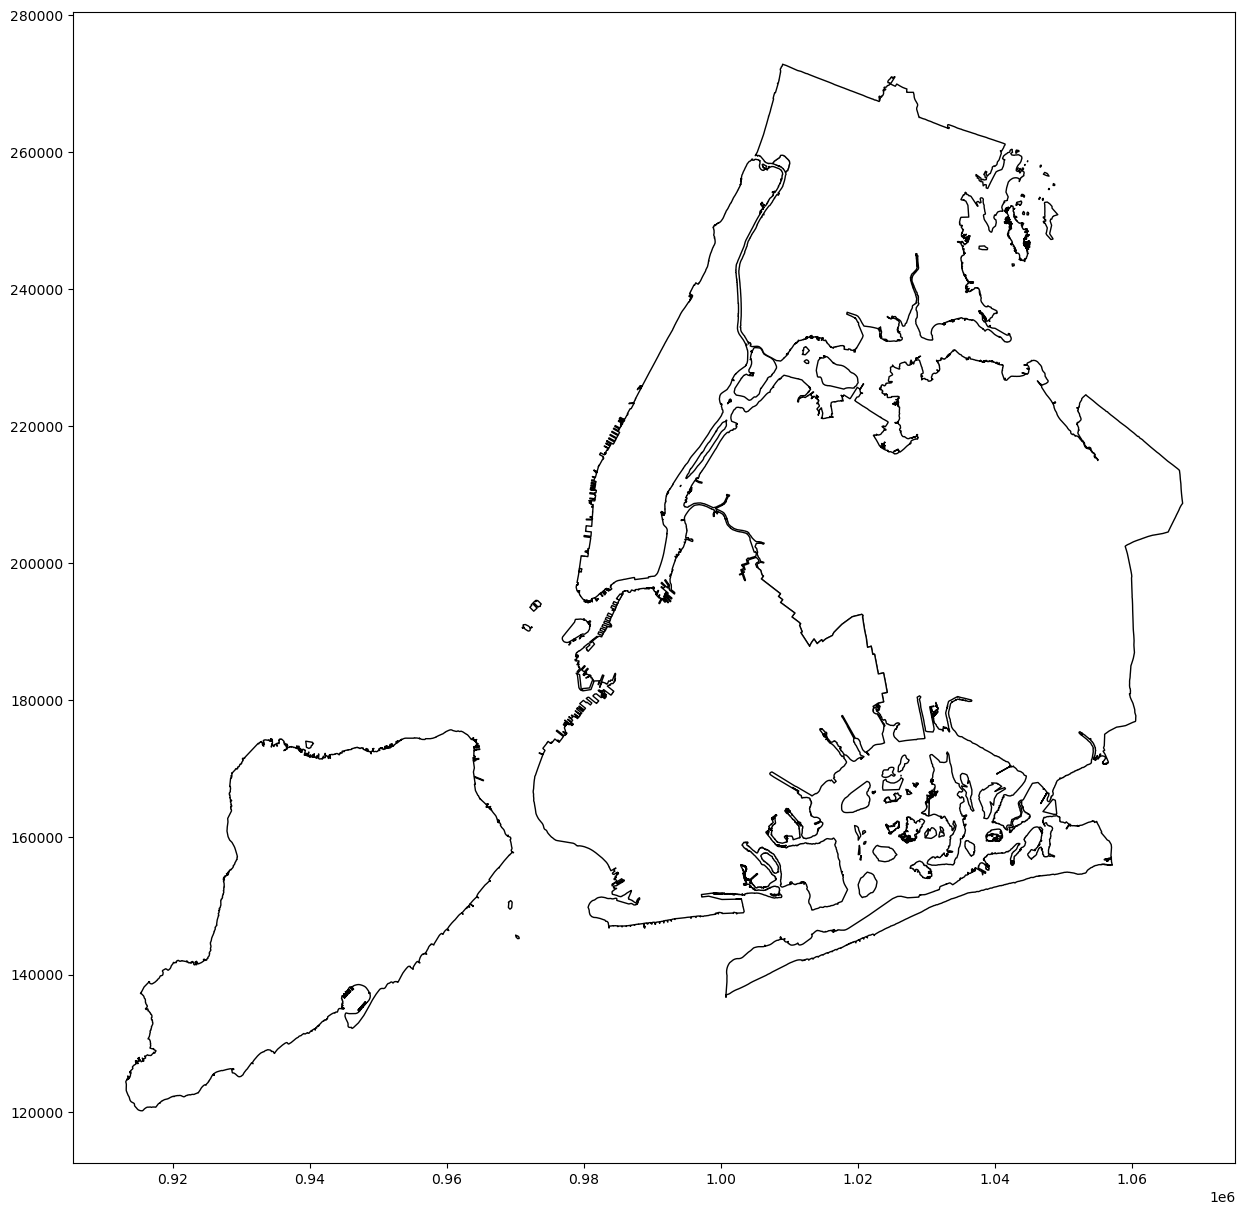

In [14]:
import geopandas
from geodatasets import get_path
import matplotlib.pyplot as plt

path_to_data = get_path("nybb")
nyc_base = geopandas.read_file(path_to_data)

nyc_base = nyc_base.set_index("BoroName")

nyc_base.plot(figsize=(15, 15), color='white', edgecolor='black', linewidth=1)
# nyc_base.set_axis_off()

plt.savefig('images/nycBoroughs')

Note: At any point in this demo where we plot, we can also use the [`.explore()`](https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html#Interactive-mapping) function. This gives us an interactive map with the ability to zoom in and out, as well as view other metadata about sections of the map. Give it a try!

Now let’s overlay this projected flooding and sea level rise in 2050. For this step, we'll be using [this data set](https://data.cityofnewyork.us/City-Government/NYC-Stormwater-Flood-Map-Moderate-Flood-with-2050-/5rzh-cyqd/about_data) provided by the NYC Department of Environmental Protection (DEP).

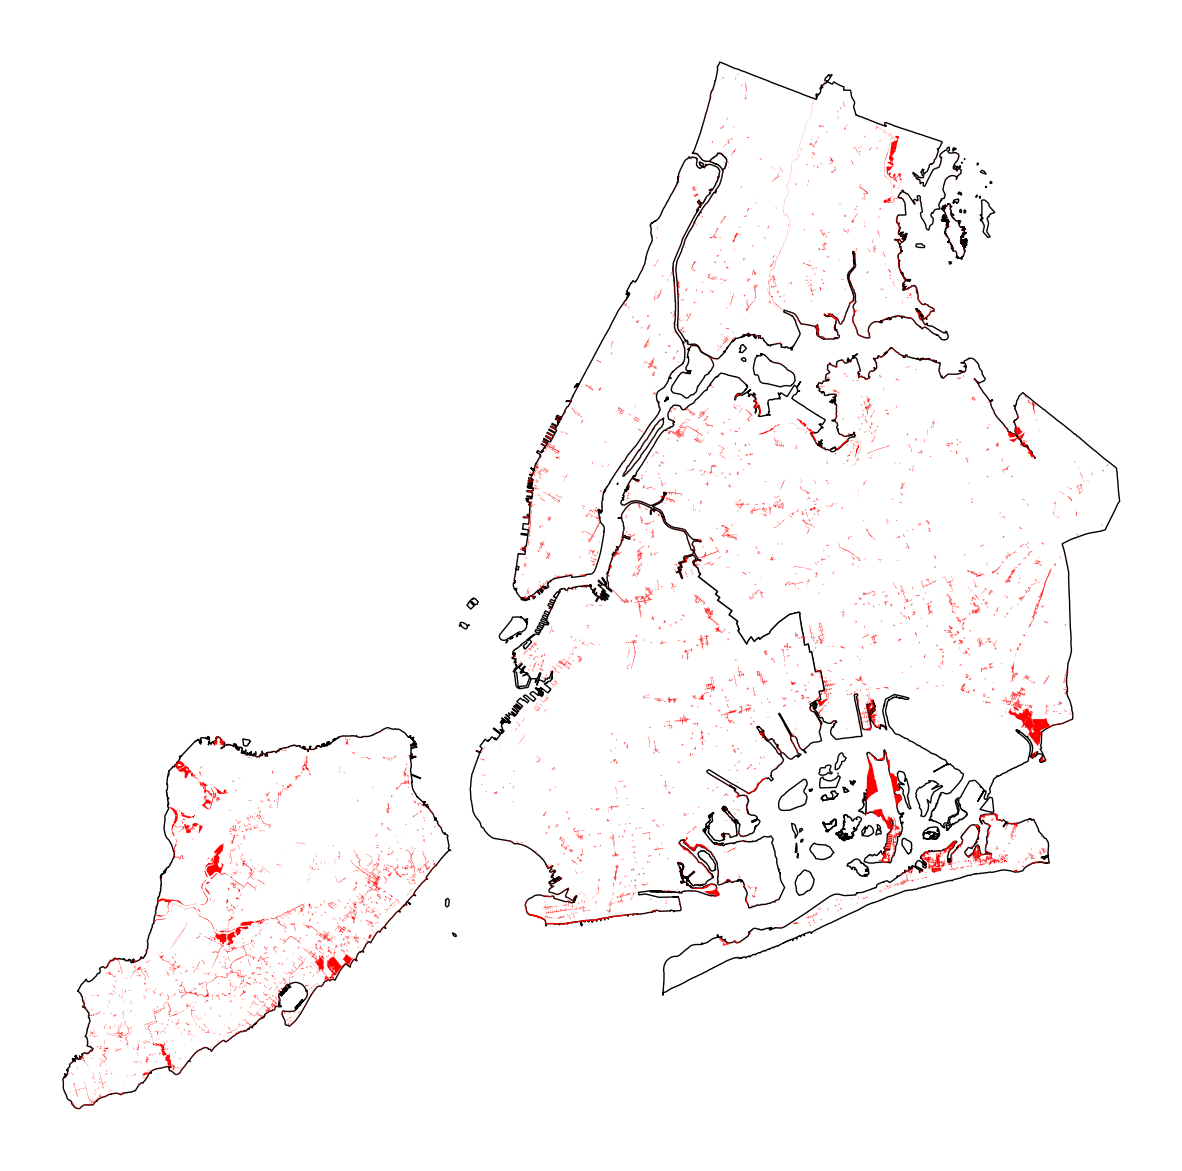

In [15]:
base = nyc_base.plot(figsize=(15, 15), color='white', edgecolor='black', linewidth=1)
base.set_axis_off()

gdf = geopandas.read_file('rawData/floodMapData2050.gdb')

gdf.plot(ax=base, color='red')

plt.savefig('images/flooding2050', dpi=200)

The areas in red indicate a few different forms of flooding. From the data dictionary that comes with our data set, we can see that these flood categories are:

- 1. Nuisance Flooding (greater or equal to 4 in. and less than 1 ft.)
- 2. Deep and Contiguous Flooding (1 ft. and greater)
- 3. Future High Tides 2050

This first one contains a key caveat about this investigation; we will only be mapping areas that are identified to be _at a minimum_ under 4 inches of water, and up to one foot.

With this understanding, let's see what our map looks like if we plot sections 1 and 2 separately from 3.

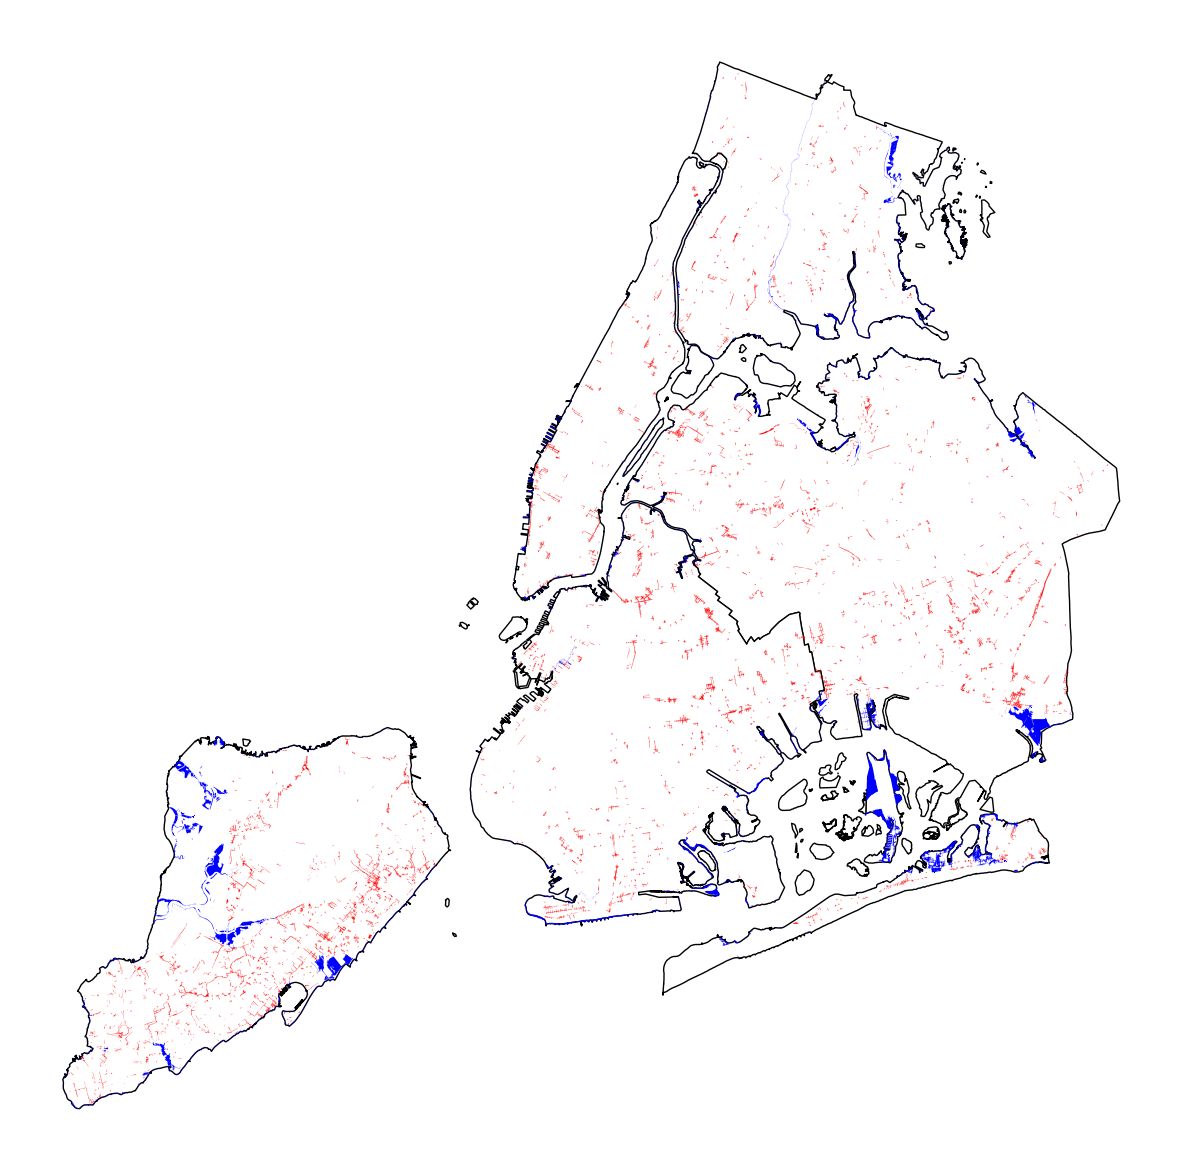

In [16]:

base = nyc_base.plot(figsize=(15, 15), color='white', edgecolor='black', linewidth=1)
base.set_axis_off()

gdf = geopandas.read_file('rawData/floodMapData2050.gdb')
gdf1 = gdf.head(2) # Keep both categories of flooding, but remove sea level changes
gdf2 = gdf.tail(1) # Keep both categories of flooding, but remove sea level changes

gdf1.plot(ax=base, color='red')
gdf2.plot(ax=base, color='blue')

plt.savefig('images/flooding2050SeparatedFloodTypes', dpi=200)

As would be expect, we can see that sea level rise primarily effects the boundaries of each borough, with areas in Staten Island being an exception.


NOTE: Everything below this point is WIP or working notes.

In [17]:
# Map housing - 1st Attempt
# This data set has points where housing developments (new building, demolitions, and renovations have taken place since 2010)
# Having points alone makes it difficult to determine how flood areas affect entire buildings

# points = geopandas.read_file(
#   "rawData/housingData/HousingDB_post2010.shp",
#   # Note: Only map new buildings in Brooklyn for now.
#   where="Job_Type='New Building' AND Boro='3'"
# )

In [18]:
# Map housing - 2nd Attempt
# Took over 3 minutes to ~attempt~ to download this

# path = 'https://data.cityofnewyork.us/api/geospatial/nqwf-w8eh?method=export&format=Original'
# building_gdf = geopandas.gpd.read_file(path)

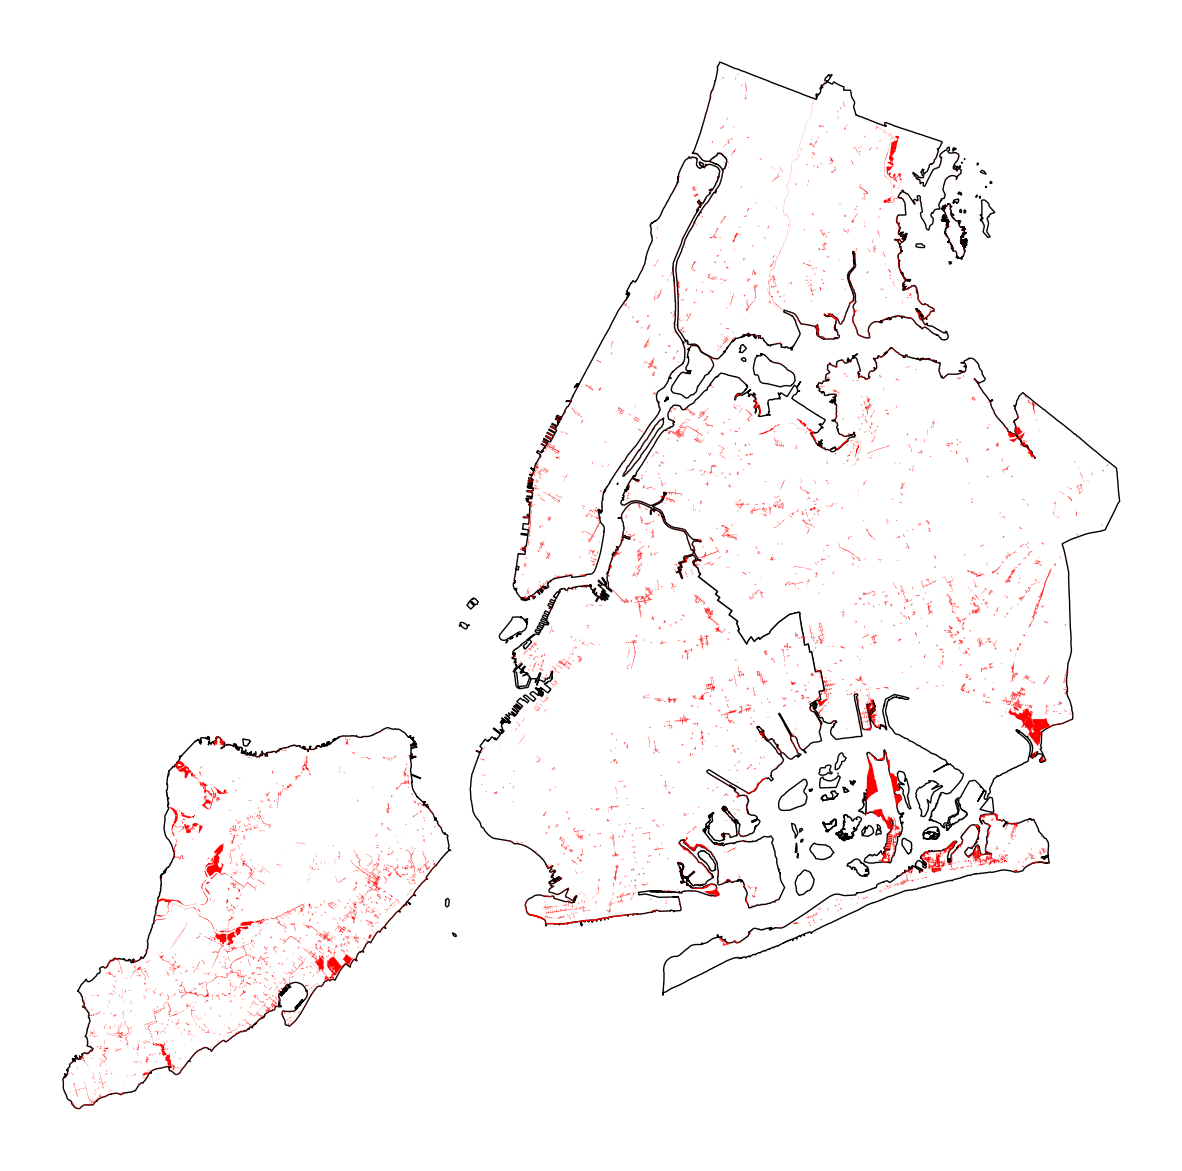

In [19]:
# Plot

# base = nyc_base.plot(figsize=(15, 15), color='white', edgecolor='black', linewidth=1)
# base.set_axis_off()

# points.plot(ax=base, markersize=0.5)

# gdf.plot(ax=base, color='red')

# plt.savefig('images/newHousingMap', dpi=200)

# Uncomment this to explore the map dynamically
# base = nyc_base.explore(figsize=(15, 15), color='white', edgecolor='black', linewidth=1, tooltip=False)
# points.explore(m=base, markersize=0.5, tooltip=False)
# gdf.explore(m=base, color='red', tooltip=False)

In [20]:
# Begin exploring the overlap between flood zones and construction

# new_buildings_subject_to_flooding = []

# # Note: Reducing the data size for now for the sake of faster processing
# for i in range(len(points.geometry.values) // 10):
#   x = points.geometry.values[i]
#   contains = gdf.contains(x)
#   if any(contains.values):
#     new_buildings_subject_to_flooding.append(x)

# print(new_buildings_subject_to_flooding)

# '''Working Notes
#   Almost all of the flood zones on the map are within streets and do not overlap with the entirety of buildings
#   The buildings as they are imported currently are simply points.
#   It is likely necessary to expand these points into full building footprints in order to more accurately assess
#     how those buildings are impacted by flooding. This is the next step.
# '''